<a href="https://www.kaggle.com/code/kmljts/activation-function-demo?scriptVersionId=186867360" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
from torch import nn, optim

import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [3]:
x = np.arange(15)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [4]:
y = np.concatenate((np.arange(0, 10, 2), np.arange(10, 5, -1), np.arange(5, 20, 3)))
y

array([ 0,  2,  4,  6,  8, 10,  9,  8,  7,  6,  5,  8, 11, 14, 17])

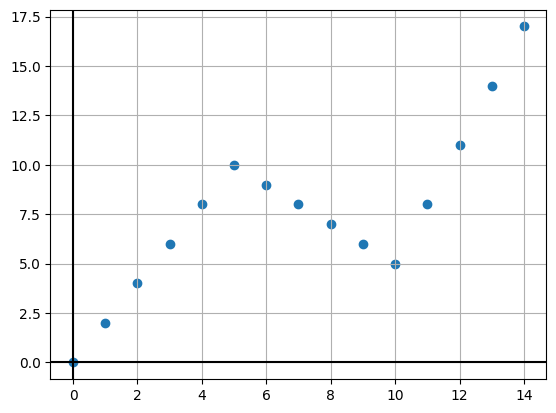

In [5]:
plt.scatter(x, y)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [6]:
X = torch.tensor(x).to(device).type(torch.float32).unsqueeze(1)

X, X.dtype, X.device, X.shape

(tensor([[ 0.],
         [ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.],
         [11.],
         [12.],
         [13.],
         [14.]]),
 torch.float32,
 device(type='cpu'),
 torch.Size([15, 1]))

In [7]:
y = torch.tensor(y).to(device).type(torch.float32).unsqueeze(1)

y, y.dtype, y.device, y.shape

(tensor([[ 0.],
         [ 2.],
         [ 4.],
         [ 6.],
         [ 8.],
         [10.],
         [ 9.],
         [ 8.],
         [ 7.],
         [ 6.],
         [ 5.],
         [ 8.],
         [11.],
         [14.],
         [17.]]),
 torch.float32,
 device(type='cpu'),
 torch.Size([15, 1]))

## Single Layer

In [8]:
class TestModel1(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [9]:
model = TestModel1().to(device)

model, model.state_dict()

(TestModel1(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight', tensor([[-0.0526]])),
              ('neural_net.0.bias', tensor([-0.2565]))]))

In [10]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[-0.2565],
        [-0.3091],
        [-0.3617],
        [-0.4143],
        [-0.4669],
        [-0.5195],
        [-0.5721],
        [-0.6247],
        [-0.6773],
        [-0.7300],
        [-0.7826],
        [-0.8352],
        [-0.8878],
        [-0.9404],
        [-0.9930]])

In [11]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [12]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[87.8626937866211]

In [13]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(6.5496, grad_fn=<MseLossBackward0>)

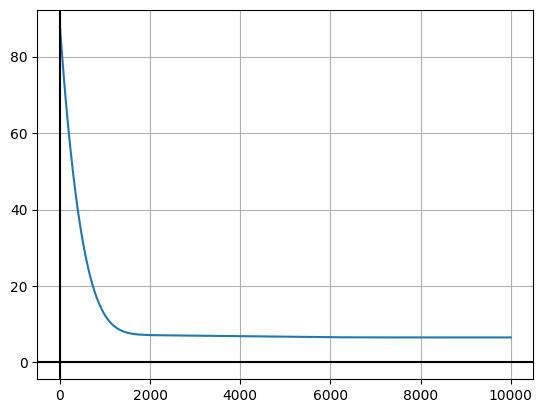

In [14]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [15]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[ 2.2916],
         [ 3.0594],
         [ 3.8273],
         [ 4.5952],
         [ 5.3630],
         [ 6.1309],
         [ 6.8988],
         [ 7.6666],
         [ 8.4345],
         [ 9.2024],
         [ 9.9702],
         [10.7381],
         [11.5060],
         [12.2738],
         [13.0417]]),
 tensor(6.5496))

In [16]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [17]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[ 2.2915628],
       [ 2.3030808],
       [ 2.3145988],
       ...,
       [13.786549 ],
       [13.798066 ],
       [13.809585 ]], dtype=float32)

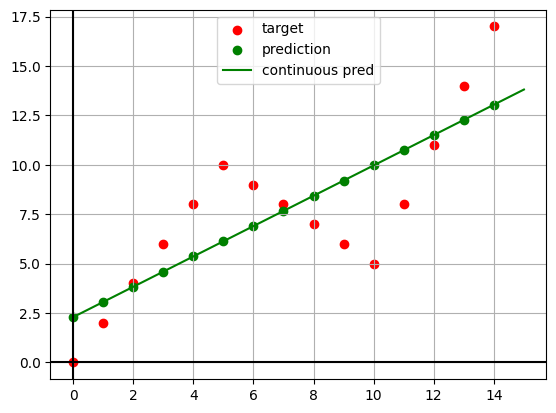

In [18]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Two Layers without Activation

In [19]:
class TestModel2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [20]:
model = TestModel2().to(device)

model, model.state_dict()

(TestModel2(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[ 0.0032],
                       [-0.8351],
                       [-0.6448],
                       [-0.2418],
                       [ 0.5769],
                       [ 0.8368],
                       [ 0.1610],
                       [ 0.3551],
                       [ 0.4104],
                       [-0.6247]])),
              ('neural_net.0.bias',
               tensor([-0.3044, -0.6400,  0.1758,  0.1649,  0.4989, -0.8343,  0.7831,  0.8125,
                       -0.5325,  0.5907])),
              ('neural_net.1.weight',
               tensor([[ 0.1414, -0.3076,  0.2526, -0.3100, -0.1877,  0.1434,  0.2420,  0.1029,
                        -0.2891, -0.2452]])),
              ('neural_net.1.bias', tensor([0.1368]))]))

In [21]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[0.3528],
        [0.6439],
        [0.9350],
        [1.2260],
        [1.5171],
        [1.8082],
        [2.0992],
        [2.3903],
        [2.6814],
        [2.9724],
        [3.2635],
        [3.5546],
        [3.8456],
        [4.1367],
        [4.4278]])

In [22]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[38.6330451965332]

In [24]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(6.5496, grad_fn=<MseLossBackward0>)

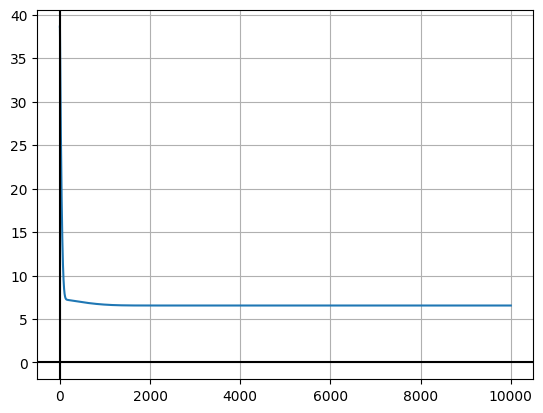

In [25]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [26]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[ 2.2917],
         [ 3.0595],
         [ 3.8274],
         [ 4.5952],
         [ 5.3631],
         [ 6.1310],
         [ 6.8988],
         [ 7.6667],
         [ 8.4345],
         [ 9.2024],
         [ 9.9702],
         [10.7381],
         [11.5060],
         [12.2738],
         [13.0417]]),
 tensor(6.5496))

In [27]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [28]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[ 2.2916667],
       [ 2.3031845],
       [ 2.3147023],
       ...,
       [13.786487 ],
       [13.798005 ],
       [13.809524 ]], dtype=float32)

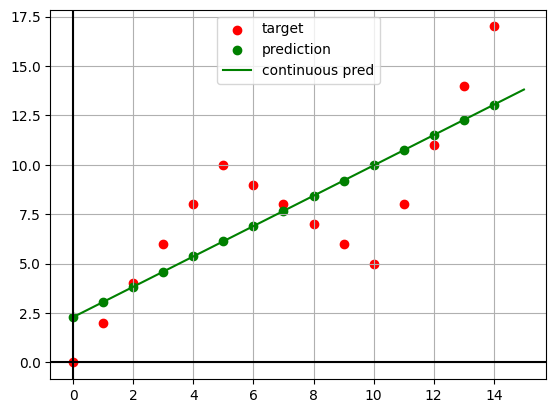

In [29]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Two Layers with Activation (ReLU)

In [30]:
class TestModel3(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [31]:
model = TestModel3().to(device)

model, model.state_dict()

(TestModel3(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): ReLU()
     (2): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[ 0.3366],
                       [ 0.9516],
                       [ 0.3483],
                       [ 0.4174],
                       [ 0.1883],
                       [ 0.5774],
                       [-0.3928],
                       [ 0.9192],
                       [-0.4831],
                       [-0.8900]])),
              ('neural_net.0.bias',
               tensor([ 0.4010,  0.3970,  0.6521,  0.5363, -0.6353, -0.1893, -0.6641, -0.2057,
                       -0.5956, -0.3108])),
              ('neural_net.2.weight',
               tensor([[ 0.1909,  0.0499,  0.2264, -0.2935, -0.0013, -0.1097,  0.0672, -0.2363,
                        -0.2973, -0.2864]])),
              ('neural_net.2.bias', tensor([0.1642]))]))

In [32]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[ 0.2507],
        [ 0.1076],
        [-0.1049],
        [-0.3174],
        [-0.5301],
        [-0.7428],
        [-0.9556],
        [-1.1683],
        [-1.3811],
        [-1.5939],
        [-1.8066],
        [-2.0194],
        [-2.2321],
        [-2.4449],
        [-2.6576]])

In [33]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[102.55467987060547]

In [35]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(5.7440, grad_fn=<MseLossBackward0>)

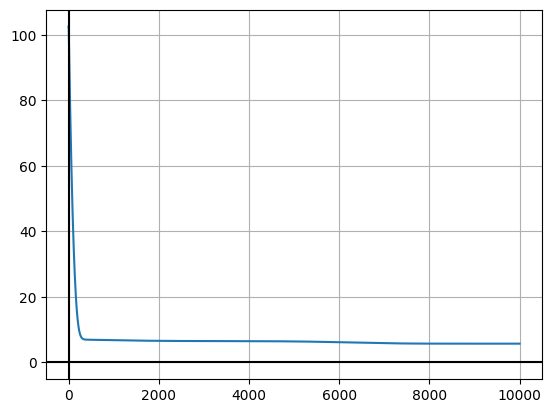

In [36]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [37]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[5.3205e-03],
         [2.0010e+00],
         [3.9967e+00],
         [5.8714e+00],
         [6.4554e+00],
         [7.0394e+00],
         [7.6233e+00],
         [8.2073e+00],
         [8.7913e+00],
         [9.3753e+00],
         [9.9593e+00],
         [1.0543e+01],
         [1.1127e+01],
         [1.1711e+01],
         [1.2295e+01]]),
 tensor(5.7440))

In [38]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [39]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[5.3204931e-03],
       [3.5252132e-02],
       [6.5187559e-02],
       ...,
       [1.2861631e+01],
       [1.2870395e+01],
       [1.2879151e+01]], dtype=float32)

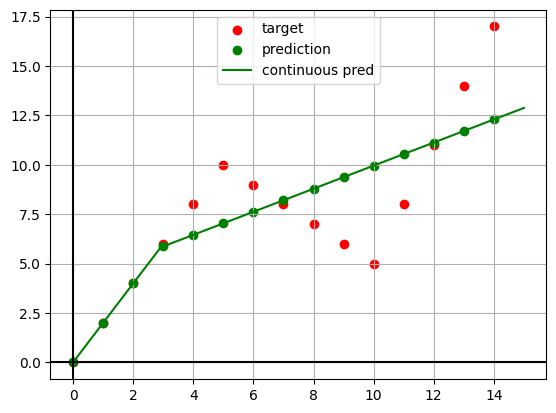

In [40]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Three Layers with Activation (ReLU)

In [41]:
class TestModel4(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [42]:
model = TestModel4().to(device)

model, model.state_dict()

(TestModel4(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): ReLU()
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): ReLU()
     (4): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[-0.0895],
                       [ 0.5079],
                       [ 0.4283],
                       [-0.6049],
                       [-0.0577],
                       [-0.9032],
                       [ 0.5282],
                       [-0.4738],
                       [-0.6831],
                       [-0.9065]])),
              ('neural_net.0.bias',
               tensor([ 0.2514,  0.9485,  0.6222,  0.9044,  0.4102, -0.8967,  0.7729, -0.8517,
                       -0.5342,  0.3244])),
              ('neural_net.2.weight',
               tensor([[ 0.2929,  0.3110, -0.1442, -0.0087, -0.0350,  0.1446, -0.1409,  0.0556,
                        -0.0465, -0.0710],
 

In [43]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[ 0.1264],
        [ 0.1179],
        [ 0.0895],
        [ 0.0549],
        [ 0.0224],
        [-0.0101],
        [-0.0426],
        [-0.0751],
        [-0.1067],
        [-0.1383],
        [-0.1698],
        [-0.2013],
        [-0.2329],
        [-0.2644],
        [-0.2959]])

In [44]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [45]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[78.39900207519531]

In [46]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(6.8653e-05, grad_fn=<MseLossBackward0>)

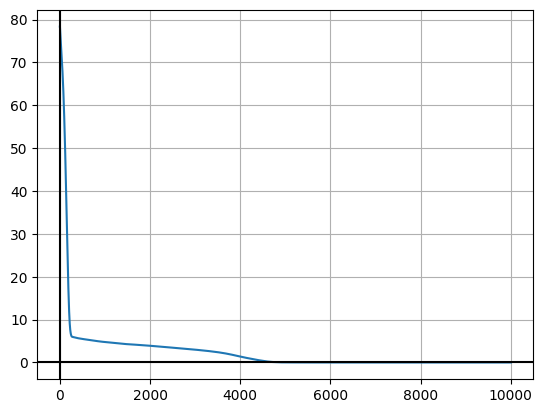

In [47]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [48]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[8.5220e-03],
         [1.9935e+00],
         [4.0095e+00],
         [6.0093e+00],
         [8.0092e+00],
         [1.0003e+01],
         [9.0043e+00],
         [8.0051e+00],
         [7.0059e+00],
         [6.0092e+00],
         [5.0078e+00],
         [8.0086e+00],
         [1.1009e+01],
         [1.4010e+01],
         [1.7011e+01]]),
 tensor(6.6312e-05))

In [49]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [50]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[8.5220486e-03],
       [3.8296714e-02],
       [6.8071380e-02],
       ...,
       [1.9921650e+01],
       [1.9965805e+01],
       [2.0008478e+01]], dtype=float32)

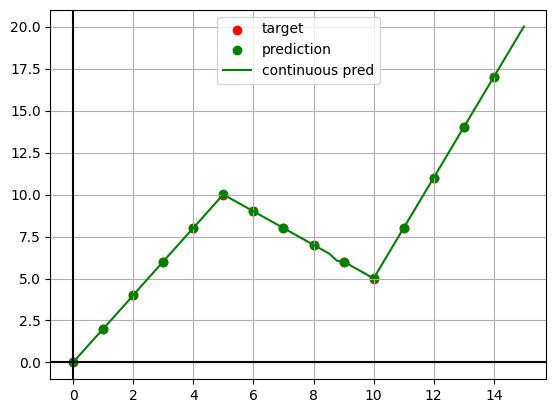

In [51]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Three Layers with Activation (LeakyReLU)

In [52]:
class TestModel5(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [53]:
model = TestModel5().to(device)

model, model.state_dict()

(TestModel5(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): LeakyReLU(negative_slope=0.01)
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): LeakyReLU(negative_slope=0.01)
     (4): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[-0.1241],
                       [-0.2038],
                       [ 0.8402],
                       [-0.6714],
                       [-0.3607],
                       [-0.6642],
                       [ 0.3481],
                       [ 0.1414],
                       [ 0.1523],
                       [ 0.5973]])),
              ('neural_net.0.bias',
               tensor([ 0.1826,  0.3420, -0.5645, -0.8850, -0.5954, -0.0096,  0.4103,  0.5322,
                       -0.5225,  0.9153])),
              ('neural_net.2.weight',
               tensor([[-0.2291, -0.1085,  0.1557,  0.2549, -0.1179,  0.1394, -0.1012,  0.20

In [54]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[-0.0839],
        [-0.0808],
        [-0.0963],
        [-0.1603],
        [-0.2443],
        [-0.3270],
        [-0.4097],
        [-0.4923],
        [-0.5774],
        [-0.6634],
        [-0.7493],
        [-0.8353],
        [-0.9212],
        [-1.0072],
        [-1.0931]])

In [55]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [56]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[86.79812622070312]

In [57]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(5.7440, grad_fn=<MseLossBackward0>)

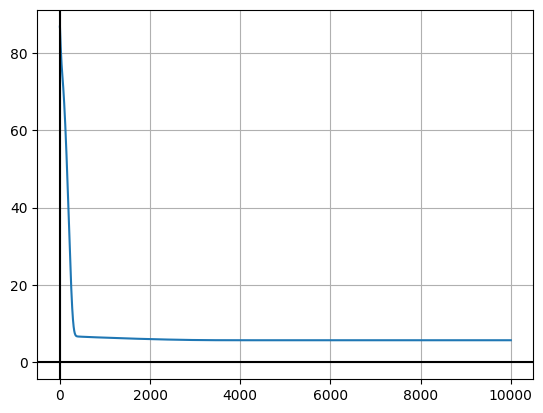

In [58]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [59]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[1.1921e-07],
         [2.0000e+00],
         [4.0000e+00],
         [5.8718e+00],
         [6.4557e+00],
         [7.0396e+00],
         [7.6235e+00],
         [8.2075e+00],
         [8.7914e+00],
         [9.3753e+00],
         [9.9592e+00],
         [1.0543e+01],
         [1.1127e+01],
         [1.1711e+01],
         [1.2295e+01]]),
 tensor(5.7440))

In [60]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [61]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[1.1920929e-07],
       [3.0000448e-02],
       [6.0000360e-02],
       ...,
       [1.2861272e+01],
       [1.2870030e+01],
       [1.2878788e+01]], dtype=float32)

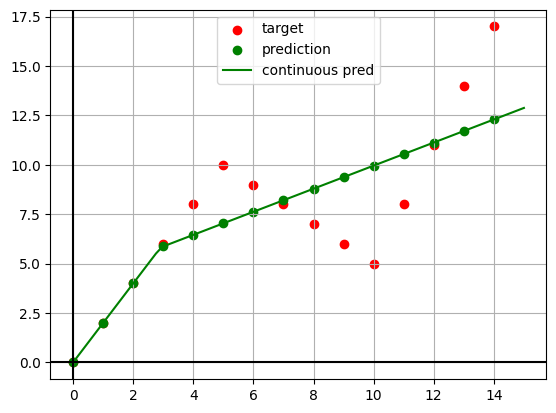

In [62]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Three Layers with Activation (GELU)

In [63]:
class TestModel6(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.GELU(),
            nn.Linear(10, 10),
            nn.GELU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [64]:
model = TestModel6().to(device)

model, model.state_dict()

(TestModel6(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): GELU(approximate='none')
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): GELU(approximate='none')
     (4): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[-0.3521],
                       [-0.2557],
                       [ 0.0966],
                       [-0.2149],
                       [ 0.1547],
                       [ 0.7084],
                       [ 0.1830],
                       [-0.9751],
                       [-0.6631],
                       [-0.9406]])),
              ('neural_net.0.bias',
               tensor([ 0.6736, -0.6466,  0.2497,  0.8596,  0.3146, -0.9969,  0.8419,  0.5969,
                       -0.2902,  0.8607])),
              ('neural_net.2.weight',
               tensor([[-0.0074,  0.0200, -0.2977, -0.0988, -0.1491,  0.1124,  0.0342, -0.0782,
        

In [65]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[0.3283],
        [0.3332],
        [0.3349],
        [0.3349],
        [0.3293],
        [0.3195],
        [0.3078],
        [0.2964],
        [0.2871],
        [0.2805],
        [0.2766],
        [0.2748],
        [0.2746],
        [0.2754],
        [0.2768]])

In [66]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [67]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[71.9128189086914]

In [68]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(0.0582, grad_fn=<MseLossBackward0>)

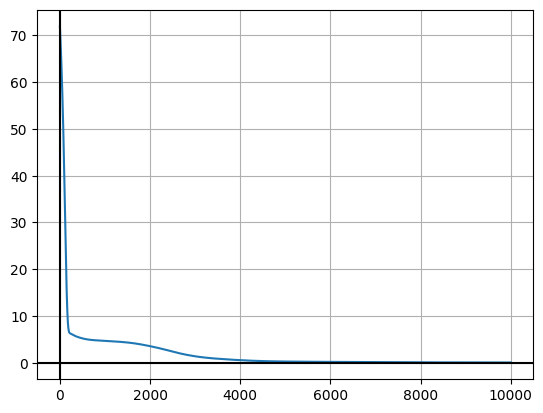

In [69]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [70]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[-5.5622e-03],
         [ 2.0092e+00],
         [ 3.9930e+00],
         [ 5.9940e+00],
         [ 8.0146e+00],
         [ 9.9705e+00],
         [ 9.0303e+00],
         [ 7.9916e+00],
         [ 7.0358e+00],
         [ 5.6302e+00],
         [ 5.7103e+00],
         [ 7.6515e+00],
         [ 1.0809e+01],
         [ 1.4251e+01],
         [ 1.6913e+01]]),
 tensor(0.0582))

In [71]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [72]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[-5.5622458e-03],
       [ 9.3535960e-02],
       [ 1.8653983e-01],
       ...,
       [ 1.8381319e+01],
       [ 1.8397720e+01],
       [ 1.8414000e+01]], dtype=float32)

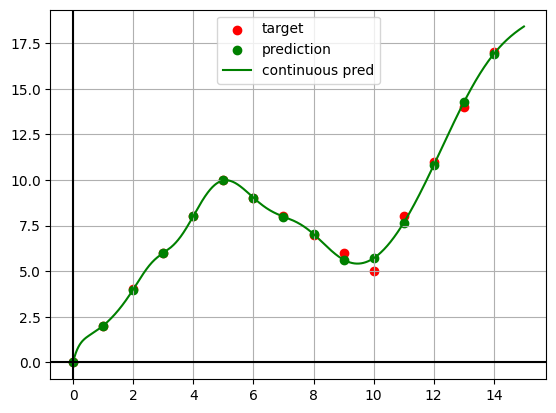

In [73]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Four Layers with Activation (ReLU)

In [74]:
class TestModel7(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [75]:
model = TestModel7().to(device)

model, model.state_dict()

(TestModel7(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): ReLU()
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): ReLU()
     (4): Linear(in_features=10, out_features=10, bias=True)
     (5): ReLU()
     (6): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[ 0.9567],
                       [ 0.3367],
                       [ 0.2175],
                       [-0.4985],
                       [-0.7028],
                       [ 0.1979],
                       [ 0.3413],
                       [-0.8887],
                       [ 0.9785],
                       [-0.0098]])),
              ('neural_net.0.bias',
               tensor([-0.4070, -0.8956,  0.1291,  0.3155,  0.6103, -0.8934,  0.5433,  0.0348,
                       -0.6981,  0.5669])),
              ('neural_net.2.weight',
               tensor([[-0.3105, -0.2022,  0.2050,  0.1603, -0

In [76]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[0.2868],
        [0.3327],
        [0.4400],
        [0.5738],
        [0.7198],
        [0.8792],
        [1.0411],
        [1.2032],
        [1.3653],
        [1.5273],
        [1.6894],
        [1.8514],
        [2.0134],
        [2.1757],
        [2.3385]])

In [77]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [78]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[55.1176872253418]

In [79]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(4.6216e-06, grad_fn=<MseLossBackward0>)

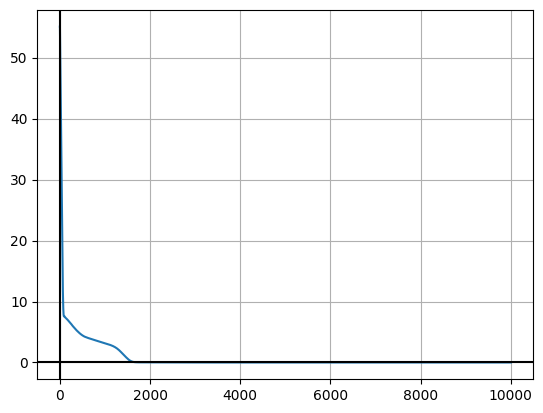

In [80]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [81]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[-6.0122e-04],
         [ 1.9995e+00],
         [ 3.9985e+00],
         [ 5.9974e+00],
         [ 7.9990e+00],
         [ 9.9986e+00],
         [ 8.9984e+00],
         [ 7.9981e+00],
         [ 6.9975e+00],
         [ 5.9971e+00],
         [ 4.9991e+00],
         [ 7.9960e+00],
         [ 1.0996e+01],
         [ 1.3995e+01],
         [ 1.6995e+01]]),
 tensor(7.8311e-06))

In [82]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [83]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[-6.0121715e-04],
       [ 2.3155406e-02],
       [ 4.6912029e-02],
       ...,
       [ 1.9904619e+01],
       [ 1.9949615e+01],
       [ 1.9994610e+01]], dtype=float32)

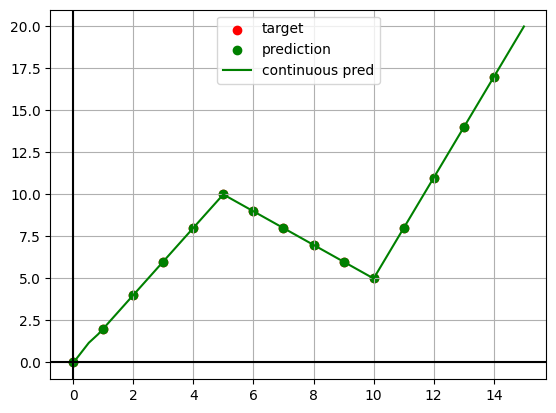

In [84]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()